In [59]:
import numpy as np
import pandas as pd

# Dialysis Facility
file_path = 'DFC_FACILITY.csv'

# Read the CSV file into a DataFrame
dfc = pd.read_csv(file_path,  encoding="ISO-8859-1")

print(dfc.head())
print(dfc.describe())
print(dfc.info())

   CMS Certification Number (CCN)  Network  \
0                           12306        8   
1                           12500        8   
2                           12501        8   
3                           12502        8   
4                           12505        8   

                           Facility Name       Five Star Date  Five Star  \
0            CHILDRENS HOSPITAL DIALYSIS  01Jan2020-31Dec2023        NaN   
1                       FMC CAPITOL CITY  01Jan2020-31Dec2023        1.0   
2                DaVita Gadsden Dialysis  01Jan2020-31Dec2023        2.0   
3  DaVita Tuscaloosa University Dialysis  01Jan2020-31Dec2023        1.0   
4                  DaVita PDI-Montgomery  01Jan2020-31Dec2023        3.0   

   Five Star Data Availability Code          Address Line 1 Address Line 2  \
0                               260   1600 7TH AVENUE SOUTH            NaN   
1                                 1    255 S JACKSON STREET            NaN   
2                               

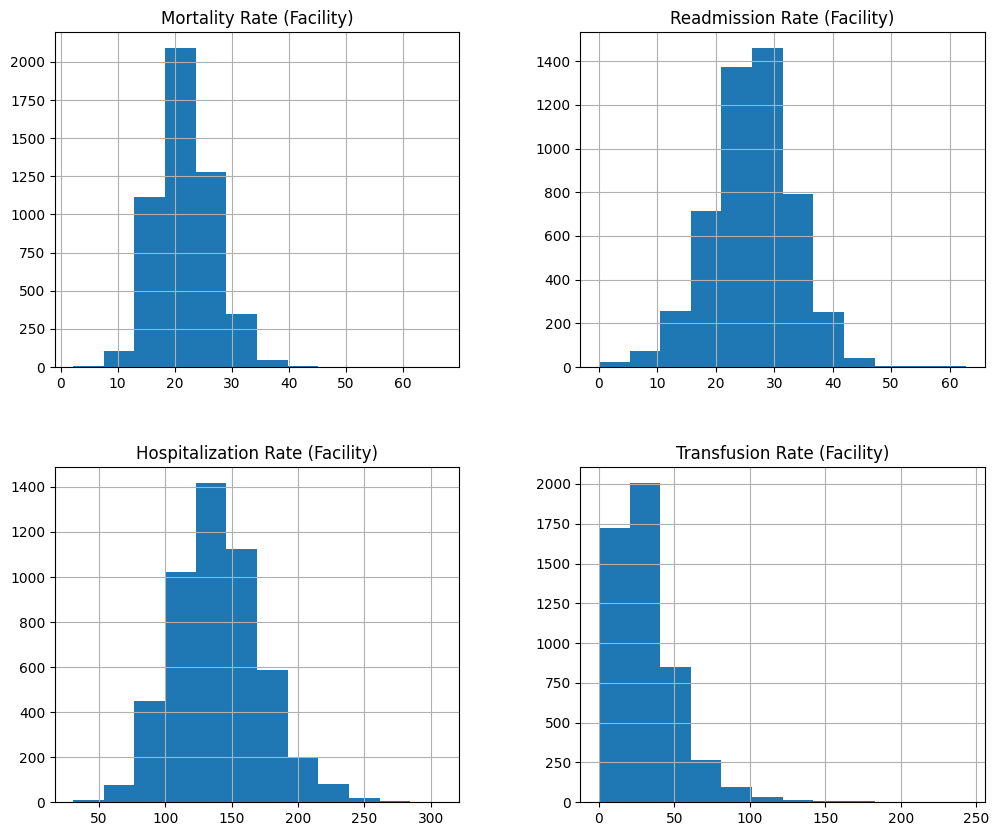

In [60]:
# Plot histograms of numerical features and clean dataset(remove nans)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

dfc = dfc[['Mortality Rate (Facility)', 'Readmission Rate (Facility)', 'Hospitalization Rate (Facility)', 'Transfusion Rate (Facility)']]
dfc = dfc.dropna(subset=['Mortality Rate (Facility)', 'Readmission Rate (Facility)', 'Hospitalization Rate (Facility)', 'Transfusion Rate (Facility)'])

dfc.hist(bins=12, figsize=(12, 10))
plt.show()

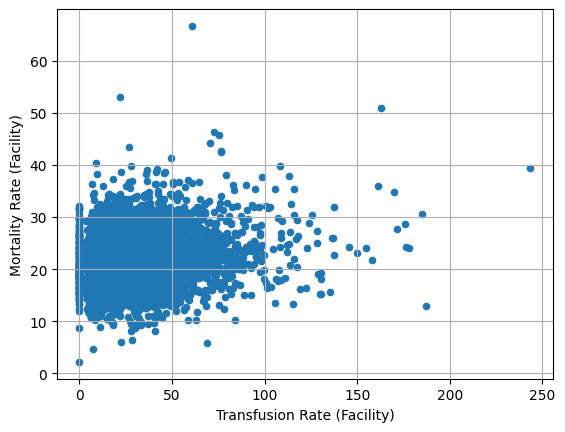

In [61]:
# Scatter plot
dfc.plot(kind="scatter", x='Transfusion Rate (Facility)', y='Mortality Rate (Facility)', grid=True)
plt.show()

In [62]:
# Train/test split
X = dfc.drop(columns=['Mortality Rate (Facility)'])
y = dfc['Mortality Rate (Facility)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [63]:
# Fit model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print model predictions
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10].round(3))

[22.52  21.098 21.405 20.469 21.    22.19  20.708 22.434 21.419 21.868]


In [65]:
# Compare the predictions with the actual values
print(y_test[:10].values)

[22.  14.4 11.3 19.1 16.3 23.  15.5 23.2 22.9 20.8]


In [66]:
# Calculate the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [ 2.36448865 46.51394902 89.42139739  7.16557005 28.83239043  3.52098489
 33.59703882  3.30336793  6.46676561  5.13622335]


In [67]:
# Calculate the root mean squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rmse_test)

4.898256389774145
5.127931029201776


In [68]:
# Train simple linear model for Transfusion Rate
X_train_transfusion = X_train[['Transfusion Rate (Facility)']]
X_test_transfusion = X_test[['Transfusion Rate (Facility)']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_transfusion, y_train)

LinearRegression()

In [69]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_transfusion)
simple_predictions_test = simple_linear_model.predict(X_test_transfusion)

In [70]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

4.92240002914417
5.159587833715236


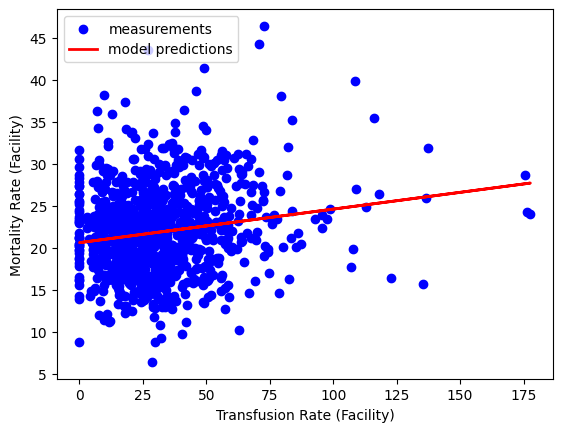

In [72]:
# Plot the simple linear regression model
plt.scatter(X_test_transfusion, y_test, color='blue', label='measurements')
plt.plot(X_test_transfusion, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("Transfusion Rate (Facility)")
plt.ylabel("Mortality Rate (Facility)")
plt.legend(loc="upper left")
plt.show()